In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

# took this code from https://colab.research.google.com/drive/1F7FzrRyAyk5dBBgKPtC93jzLrAA1-etp#scrollTo=397tptIN7hn7
from google.colab import files 
  
import io
uploaded = files.upload()
wine_data = pd.read_csv(io.BytesIO(uploaded['wine.csv']))
#df = pd.read_csv(path, names=['class_label','class_name','alcohol','malic_acid','ash','alcalinity_of_ash','magnesium','total_phenols','flavanoids','nonflavanoid_phenols','proanthocyanins','color_intensity','hue','od280','proline'])

Saving wine.csv to wine (2).csv


In [ ]:
#Create a DataFrame of given wine dataset. Standardize the features.
# i did this in the past step as i need to convert the wine_data into datframe in order to read the data from the file
#adding the columns refering the code https://www.geeksforgeeks.org/add-column-names-to-dataframe-in-pandas/
# column refetnce https://archive.ics.uci.edu/ml/datasets/wine
wine_data.columns=['class_label','alcohol','malic_acid','ash','alcalinity_of_ash','magnesium','total_phenols','flavanoids','nonflavanoid_phenols','proanthocyanins','color_intensity','hue','od280','proline']

target_data=wine_data['class_label']
#target_data.head()
#Load the dataset. What are the features?
print(wine_data.columns)
print(wine_data.head())


Index(['class_label', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
       'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue', 'od280', 'proline'],
      dtype='object')
   class_label  alcohol  malic_acid  ...   hue  od280  proline
0            1    13.20        1.78  ...  1.05   3.40     1050
1            1    13.16        2.36  ...  1.03   3.17     1185
2            1    14.37        1.95  ...  0.86   3.45     1480
3            1    13.24        2.59  ...  1.04   2.93      735
4            1    14.20        1.76  ...  1.05   2.85     1450

[5 rows x 14 columns]


In [ ]:
#Create a DataFrame of given wine dataset. Standardize the features
#i created the dataframe in the last step hence proceeding with standardizing the features

from sklearn.preprocessing import StandardScaler

x=wine_data.drop(['class_label'],axis=1)
y=target_data
scale = StandardScaler().fit(x)
X=scale.transform(x)
print(X)


[[ 0.2558245  -0.50162433 -0.8244853  ...  0.40709978  1.13169801
   0.97105248]
 [ 0.20622873  0.01802001  1.10768971 ...  0.3195674   0.80457911
   1.40099798]
 [ 1.70650069 -0.34931478  0.48793547 ... -0.4244579   1.20281081
   2.34050852]
 ...
 [ 0.34261709  1.73822194 -0.38701171 ... -1.60614514 -1.48525319
   0.28632445]
 [ 0.21862767  0.22408586  0.01400575 ... -1.56237895 -1.39991783
   0.30224836]
 [ 1.40892609  1.57695301  1.36288264 ... -1.51861275 -1.42836295
  -0.58949046]]


In [ ]:
#Split the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=42)
X_train_std=scale.transform(X_train)
X_test_std=scale.transform(X_test)
print('the lenght of the training set is',len(X_train))
print('the lenght of the test set is',len(X_test))



#Use the linalg.eig function from NumPy to obtain the eigenpairs of the Wine covariance matrix. Print the eigenvalues.
#I am using my traing set for getting the covarience matrix and eigen values
#code refernce https://numpy.org/doc/stable/reference/generated/numpy.cov.html

cov=np.cov(X_train_std.T)
#print('the covarience matrix is',cov)

#getting the eigen values 
#code reference https://towardsdatascience.com/pca-with-numpy-58917c1d0391

train_eigen_values, train_eigen_vectors = np.linalg.eig(cov)

print('the training eigen values are',train_eigen_values)
print('the training eigen vectors are',train_eigen_vectors)


the lenght of the training set is 123
the lenght of the test set is 54
the training eigen values are [6.48511668e+01 1.68338031e+01 1.26104913e+01 3.37030026e+00
 1.42800058e+00 1.09275683e+00 6.29953696e-01 3.80558092e-01
 1.42551496e-01 5.62906331e-02 4.77450985e-02 3.71274672e-03
 3.11073285e-06]
the training eigen vectors are [[ 8.13229323e-03 -2.88718199e-02  9.35462886e-02 -1.42995586e-01
  -9.23702589e-01 -1.08412888e-01 -2.13156488e-01  1.42285115e-01
   4.79104867e-02  1.88840872e-01  3.56754013e-02  3.38124004e-03
  -7.82028894e-04]
 [-4.80317166e-02 -1.05653869e-01  3.73832052e-02  3.47027826e-02
  -7.54525016e-02  4.40683548e-02 -3.33371058e-01 -9.24055321e-01
  -1.00878926e-01  1.73528890e-03 -3.30327024e-02 -2.84567760e-03
  -4.44590819e-05]
 [-8.82358821e-02  6.31663208e-02  9.69261645e-01  1.97971119e-01
   7.07837481e-02 -2.60623272e-02  2.90164618e-03  3.59120657e-02
   1.55548557e-02 -4.38627603e-03 -4.75445174e-02  7.37237237e-03
  -1.97538821e-04]
 [-1.37269683e-02

[0.6392594506773822, 0.16593637759785493, 0.12430579315071623, 0.03322216693075919, 0.014076275093375737, 0.01077166636680114, 0.006209662417534674, 0.003751287272400693, 0.0014051773585014437, 0.0005548754319677109, 0.0004706392639505998, 3.659777523040656e-05, 3.0663524986740255e-08]
[0.63925945 0.80519583 0.92950162 0.96272379 0.97680006 0.98757173
 0.99378139 0.99753268 0.99893786 0.99949273 0.99996337 0.99999997
 1.        ]


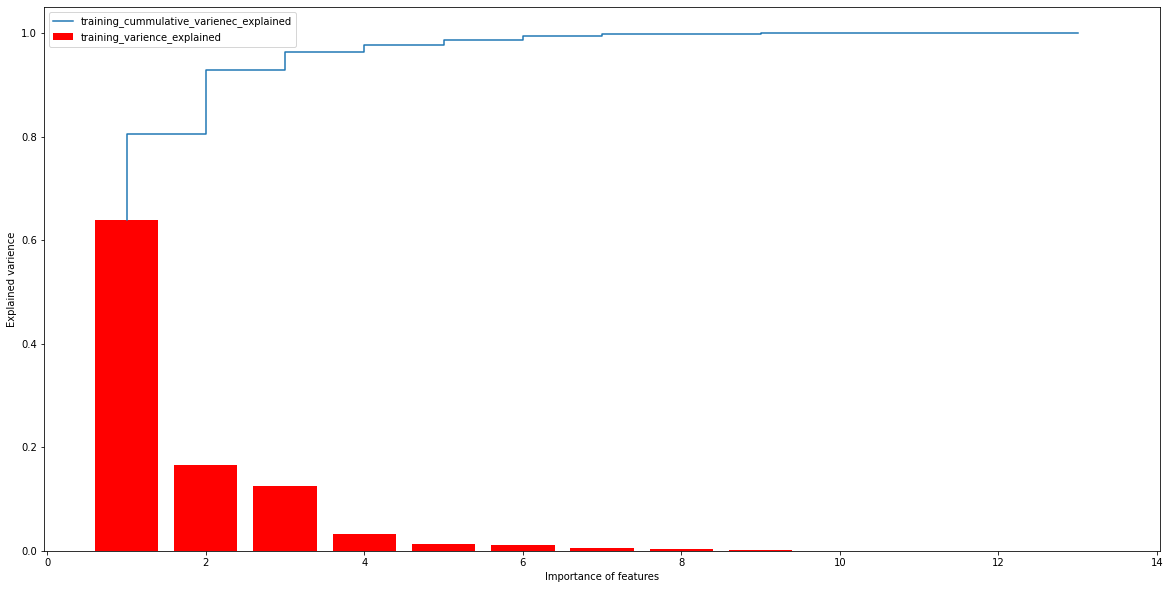

In [ ]:
#Compute and plot the individual explained variance and the cumulative explained variance (range from 1 to 14). Using the NumPy cumsum function, calculate the cumulative sum of explained variances, which you will then plot via Matplotlib's step function. Explain the outcomes.
#getting the explained varience
#refernce https://towardsdatascience.com/pca-with-numpy-58917c1d0391

train_variance_explained = []
for i in train_eigen_values:
     train_variance_explained.append((i/sum(train_eigen_values)))
        
print(train_variance_explained)

#calculating the cummulative explained varience 
train_cumulative_variance_explained = np.cumsum(train_variance_explained)
print(train_cumulative_variance_explained)

#plotting the  individual explained variance and the cumulative explained variance (range from 1 to 14)
#refernce https://vitalflux.com/pca-explained-variance-concept-python-example/
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,10))
plt.bar(range(1,14), train_variance_explained,color='red',label='training_varience_explained')
plt.step(range(1,14), train_cumulative_variance_explained,label='training_cummulative_varienec_explained')
plt.ylabel('Explained varience')
plt.xlabel('Importance of features')
plt.legend()
plt.show()


Observations:

We have divided our dataset based on the features in this case the compnents 1 and 2 give us the highest varience in our dataset and account to around 60% of the varience

In [ ]:
#-Sort the eigenpairs by decreasing order of the eigenvalues. Make a list of (eigenvalue, eigenvector) tuples. Sort the (eigenvalue, eigenvector) tuples from high to low. Print the projection matrix W.


eigen_pairs=[]

#since eigen values are complex they are sorted with real parts first explanation refernce from https://stackoverflow.com/questions/8092920/sort-eigenvalues-and-associated-eigenvectors-after-using-numpy-linalg-eig-in-pyt
for i in range(len(train_eigen_values)):
  index = train_eigen_values.argsort()[::-1]   
  eigen_pairs=list(zip(np.abs(train_eigen_values[index]),train_eigen_vectors[:,index]))


#refernce https://www.programiz.com/python-programming/methods/list/sort
eigen_pairs.sort(reverse=True)


#projection matrix
#taking the first two important features
w= np.hstack((eigen_pairs[0][1][:, np.newaxis],eigen_pairs[1][1][:, np.newaxis]))
print('the projection matrix is',w)

the projection matrix is [[ 8.13229323e-03 -4.80317166e-02]
 [-2.88718199e-02 -1.05653869e-01]
 [ 9.35462886e-02  3.73832052e-02]
 [-1.42995586e-01  3.47027826e-02]
 [-9.23702589e-01 -7.54525016e-02]
 [-1.08412888e-01  4.40683548e-02]
 [-2.13156488e-01 -3.33371058e-01]
 [ 1.42285115e-01 -9.24055321e-01]
 [ 4.79104867e-02 -1.00878926e-01]
 [ 1.88840872e-01  1.73528890e-03]
 [ 3.56754013e-02 -3.30327024e-02]
 [ 3.38124004e-03 -2.84567760e-03]
 [-7.82028894e-04 -4.44590819e-05]]


In [ ]:
#-Using the projection matrix, transform a sample x onto the PCA subspace (the principal components 1 and 2). Transform the entire 124 x 13-dimensional training dataset onto the two principal components by calculating the matrix dot product.

# since the qusetion is asking us to transform the x (training values) onto PCA subspae i am taking the fist value of x as sample
#reference for dot product https://www.geeksforgeeks.org/how-to-calculate-dot-product-of-two-vectors-in-python/

X1=X_train_std[0].dot(w)
print(X1)

#now for the rest of the training data
PCA_train=X_train_std.dot(w)
print(PCA_train)

[6.60695102 1.36136847]
[[  6.60695102   1.36136847]
 [  8.84343796 -13.07832098]
 [  6.62196267   0.12700282]
 [  5.71659783   8.92664624]
 [  4.11025151  16.16736734]
 [  5.40156718  10.75525005]
 [  6.71222836   2.9744449 ]
 [  4.19153158  11.36607639]
 [  6.4558328    4.49261599]
 [  6.91620697   2.99409125]
 [  5.62948422   8.56604418]
 [  5.78277726   7.7145043 ]
 [  6.60483138   3.87377089]
 [  5.57076597   9.44759709]
 [  5.72238222   5.42670512]
 [  7.5858498   -3.71323248]
 [  4.71735239  18.50047287]
 [  6.76794378   3.21573365]
 [  4.59802427  11.59079153]
 [  5.35234319  10.4375822 ]
 [  7.45073813  -1.03002604]
 [  4.41764962  13.12391938]
 [  4.82079238  10.47352895]
 [  8.54488229  -8.81429721]
 [  5.8304167    2.84650895]
 [  6.58030915   3.91579979]
 [  5.24243208   8.16749011]
 [  5.12508786   8.53247043]
 [  5.07825301  10.40529134]
 [  4.79127371   9.73596343]
 [  8.56839286  -8.19238558]
 [  5.9814658    5.92496892]
 [  5.63926456   9.3871801 ]
 [  8.32857625  -7.

Text(0, 0.5, 'Prinicpal component 2')

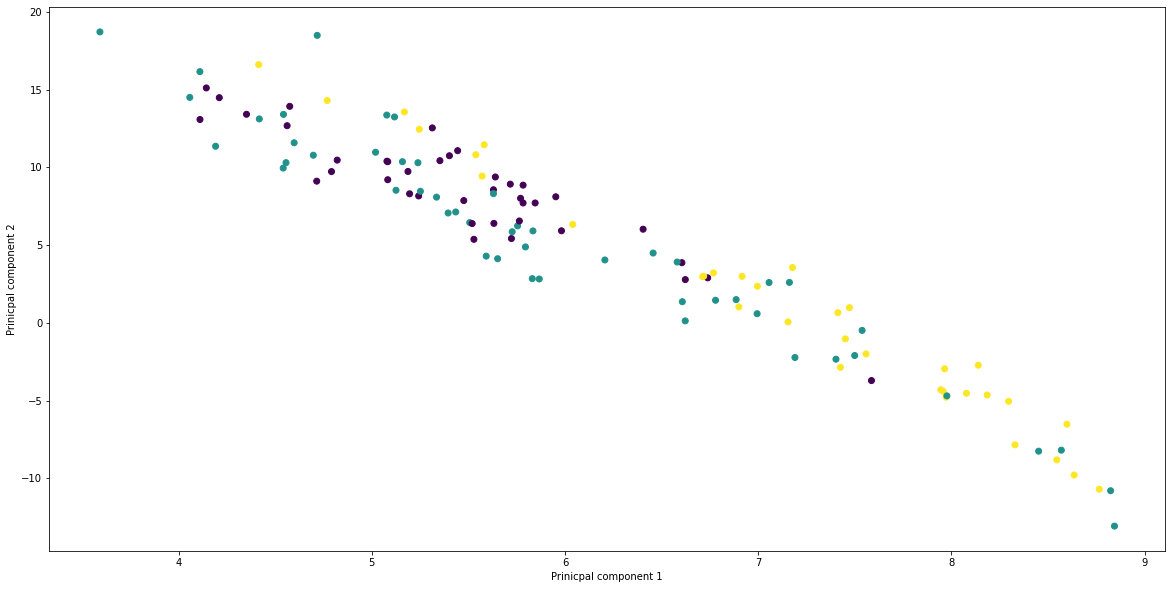

In [ ]:
#Visualize the transformed Wine training set into a two-dimensional scatterplot.
#refence https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python
#y_train.values
plt.figure(figsize=(20,10))
plt.scatter(PCA_train[ :, 0], PCA_train[ :, 1],c=y_train)
plt.xlabel('Prinicpal component 1')
plt.ylabel('Prinicpal component 2')



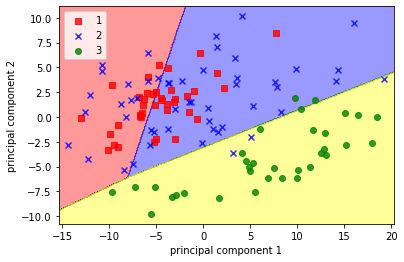

In [ ]:
#Method number 2. Import ListedColormap. Set up marker generator and color map. -----Plot the decision surface and plot the class samples.
#Import LogisticRegression and PCA. Visualize the decision regions (hint: X_train_pca, y_train, classifier=lr).

#Code refrence https://gist.github.com/rasbt/6fb65bba38b70e28e60a9842b988cc67

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA


def dec_reg(X, y, clf, resolution=0.1):
  m = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'green', 'yellow', 'purple')
  cmap = ListedColormap(colors[:len(np.unique(y))+1])
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
  values = clf.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  values = values.reshape(xx1.shape)
  plt.contourf(xx1, xx2, values, alpha=0.4, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=colors[idx],marker=markers[idx], label=cl) 



# my y training dataset had 123 elements and test dataset has 54 elements hence i am considering the test dataset 
pca=PCA(n_components=2)
train_pca = pca.fit_transform(X_train_std)
test_pca=pca.fit_transform(X_test_std)

lr=LogisticRegression()

#for training
model=lr.fit(train_pca,y_train)
dec_reg(train_pca, y_train, clf=lr)
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.legend()


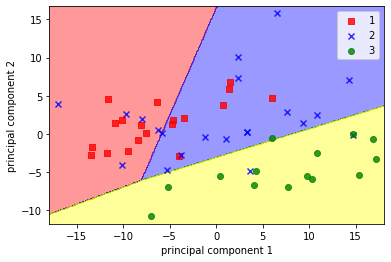

In [ ]:
#for testing

dec_reg(test_pca, y_test, clf=lr)
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.legend()

